In [119]:
# Imports
from __future__ import print_function
import os, sys
import argparse
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import mdtraj as md
import pyemma
from pyemma.util.contexts import settings
import glob as glob
import tqdm as tqdm
# Structures and Featurization ------------------------------------------------------------------------

top=md.load('./owlsnest/ref.gro', top='./owlsnest/ref.gro')

#Trajectories ---------------------------------------------------------------------------------------
traj_list = []
for directory in glob.glob('/mnt/d/dylan/RUN*/'):
    for filename in os.listdir(directory):
            if filename.endswith('xtc'):
               traj_list.append(os.path.join(directory,filename))


In [3]:
# Data
distances_data=

4095

In [2]:
# Import TICA data
distances_tica_output=np.load('/mnt/c/Users/dnova/Desktop/owlsnest/distances_tica2.5_output.npy',allow_pickle=True)
distances_tica_concatenated = np.concatenate(distances_tica_output)


/home/kpman/miniconda3/lib/python3.7/site-packages/pyemma/plots/plots2d.py:253: UserWarning: figsize=(10, 4) is not an allowed optional parameter and will be ignored
  ' be ignored'.format(key, kwargs[key]))


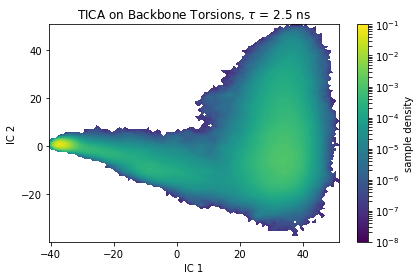

In [4]:
# Plot TICA Density
fig = pyemma.plots.plot_density(*distances_tica_concatenated[:, :2].T,logscale=True, figsize=(10,4))
plt.title('TICA on Backbone Torsions, $\\tau$ = 2.5 ns')
plt.xlabel('IC 1')
plt.ylabel('IC 2')
plt.tight_layout()
#plt.savefig('tica_1.png')

In [3]:
# Import TICA CLuster Centers
cluster_centers = np.load('/mnt/c/Users/dnova/Desktop/owlsnest/distances_cluster2.5_centers.npy',allow_pickle=True)
cluster_dtrajs=list(np.load('/mnt/c/Users/dnova/Desktop/owlsnest/distances_cluster2.5_dtrajs.npy',allow_pickle=True))
distances_dtrajs_concatenated =np.concatenate(np.load('/mnt/c/Users/dnova/Desktop/owlsnest/distances_cluster2.5_dtrajs.npy',allow_pickle=True))


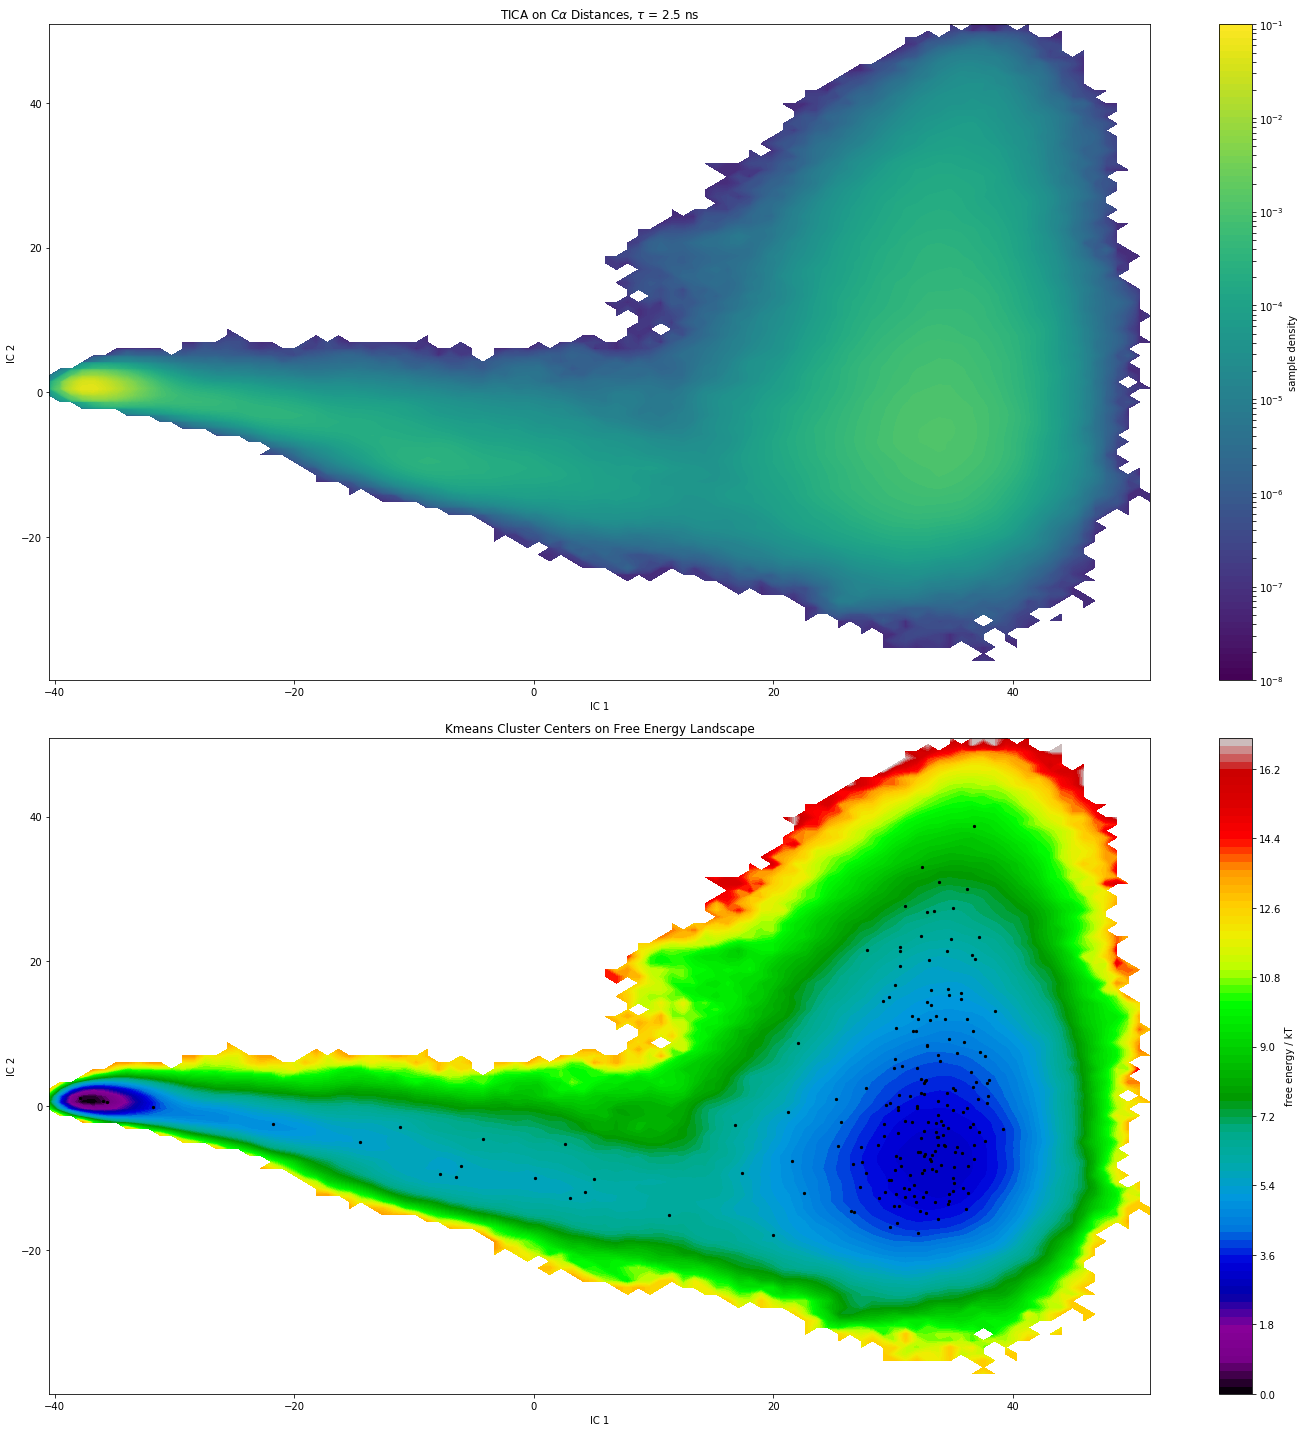

In [45]:
# Tica Density + Free Energy
fig, ax = plt.subplots(2,1,figsize=(20,20))
pyemma.plots.plot_density(*distances_tica_concatenated[:, :2].T,logscale=True, ax=ax[0])
ax[0].set_title('TICA on C$\\alpha$ Distances, $\\tau$ = 2.5 ns')
ax[0].set_xlabel('IC 1')
ax[0].set_ylabel('IC 2')
pyemma.plots.plot_free_energy(
    *distances_tica_concatenated[:, :2].T,
    weights=np.concatenate(distances_msm.trajectory_weights()),
    ax=ax[1],
    legacy=False)
ax[1].scatter(*cluster_centers[:, :2].T, s=5, c='black')
ax[1].set_title('Kmeans Cluster Centers on Free Energy Landscape')
ax[1].set_xlabel('IC 1')
ax[1].set_ylabel('IC 2')
fig.tight_layout()
fig.savefig('All_tica.png')

In [61]:
# Implied timescales...done on owlsnest
its = pyemma.msm.its(distances_cluster.dtrajs, lags=60, nits=10) # was 50 before lags
fig, ax = plt.subplots()
pyemma.plots.plot_implied_timescales(its, units='ns', dt=0.5, ax=ax); # was 2.5
ax.set_title('Implied Timescales for Markov State Model')

NameError: name 'distances_cluster' is not defined

In [62]:
# Build MSM.. Lag from ITS plots
distances_msm = pyemma.msm.bayesian_markov_model( cluster_dtrajs, lag=60, dt_traj='0.5 ns')
print('fraction of states used = {:.2f}'.format(distances_msm.active_state_fraction))
print('fraction of counts used = {:.2f}'.format(distances_msm.active_count_fraction))

fraction of states used = 1.00
fraction of counts used = 1.00


In [63]:
# Only Use Active Trajs
distances_dtrajs_concatenated=np.concatenate(distances_msm.dtrajs_active)
print(len(distances_dtrajs_concatenated))

13545589


In [64]:
# Is my MSM reversible?
distances_msm.reversible

True

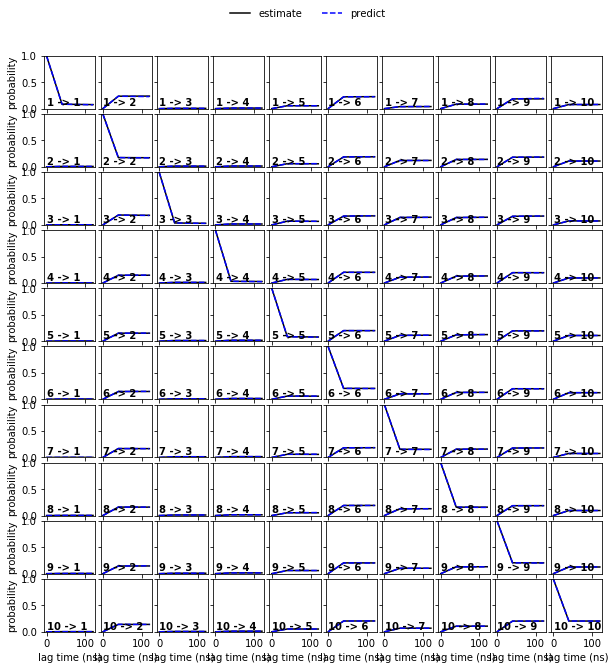

In [14]:
# CK test for efficacy
nstates = 10
distances_cktest = distances_msm.cktest(nstates, mlags=4)
pyemma.plots.plot_cktest(distances_cktest, dt=0.5, units='ns')
fig.savefig('CK_test.png')

In [ ]:
pyemma.plots.plot_cktest(distances_cktest, dt=0.5, units='ns')


Process ForkPoolWorker-115:
Traceback (most recent call last):
  File "/home/kpman/miniconda3/lib/python3.7/site-packages/multiprocess/process.py", line 297, in _bootstrap
    self.run()
  File "/home/kpman/miniconda3/lib/python3.7/site-packages/multiprocess/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/kpman/miniconda3/lib/python3.7/site-packages/multiprocess/pool.py", line 110, in worker
    task = get()
  File "/home/kpman/miniconda3/lib/python3.7/site-packages/multiprocess/queues.py", line 357, in get
    return _ForkingPickler.loads(res)
  File "/home/kpman/miniconda3/lib/python3.7/site-packages/dill/_dill.py", line 275, in loads
    return load(file, ignore, **kwds)
  File "/home/kpman/miniconda3/lib/python3.7/site-packages/dill/_dill.py", line 270, in load
    return Unpickler(file, ignore=ignore, **kwds).load()
  File "/home/kpman/miniconda3/lib/python3.7/site-packages/dill/_dill.py", line 472, in load
    obj = StockUnpickler.load(sel

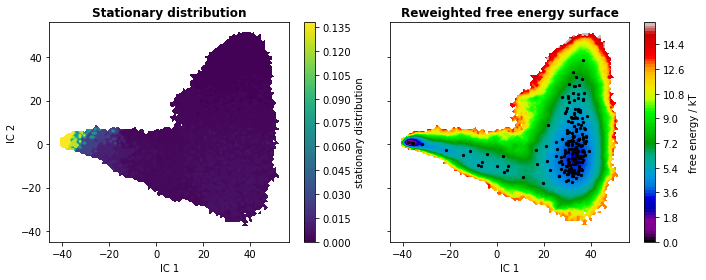

Process ForkPoolWorker-127:
Process ForkPoolWorker-126:
Process ForkPoolWorker-125:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/kpman/miniconda3/lib/python3.7/site-packages/multiprocess/process.py", line 297, in _bootstrap
    self.run()
  File "/home/kpman/miniconda3/lib/python3.7/site-packages/multiprocess/process.py", line 297, in _bootstrap
    self.run()
  File "/home/kpman/miniconda3/lib/python3.7/site-packages/multiprocess/process.py", line 297, in _bootstrap
    self.run()
  File "/home/kpman/miniconda3/lib/python3.7/site-packages/multiprocess/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/kpman/miniconda3/lib/python3.7/site-packages/multiprocess/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/kpman/miniconda3/lib/python3.7/site-packages/multiprocess/process.py", line 99, in run
    self._target(*self._args, **self._kwargs

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4), sharex=True, sharey=True)
pyemma.plots.plot_contour(
    *distances_tica_concatenated[:,:2].T,
    distances_msm.pi[distances_dtrajs_concatenated],
    ax=axes[0],
   mask=True,
    cbar_label='stationary distribution')
pyemma.plots.plot_free_energy(
    *distances_tica_concatenated[:, :2].T,
    weights=np.concatenate(distances_msm.trajectory_weights()),
    ax=axes[1],
    legacy=False)
axes[1].scatter(*cluster_centers[:, :2].T, s=5, c='black')
for ax in axes.flat:
    ax.set_xlabel('IC 1')
axes[0].set_ylabel('IC 2')
axes[0].set_title('Stationary distribution', fontweight='bold')
axes[1].set_title('Reweighted free energy surface', fontweight='bold')
fig.tight_layout()

The first eigenvector is one: True (min=0.9999999999958915, max=1.0000000000035132)


AttributeError: 'numpy.ndarray' object has no attribute 'set_ylabel'

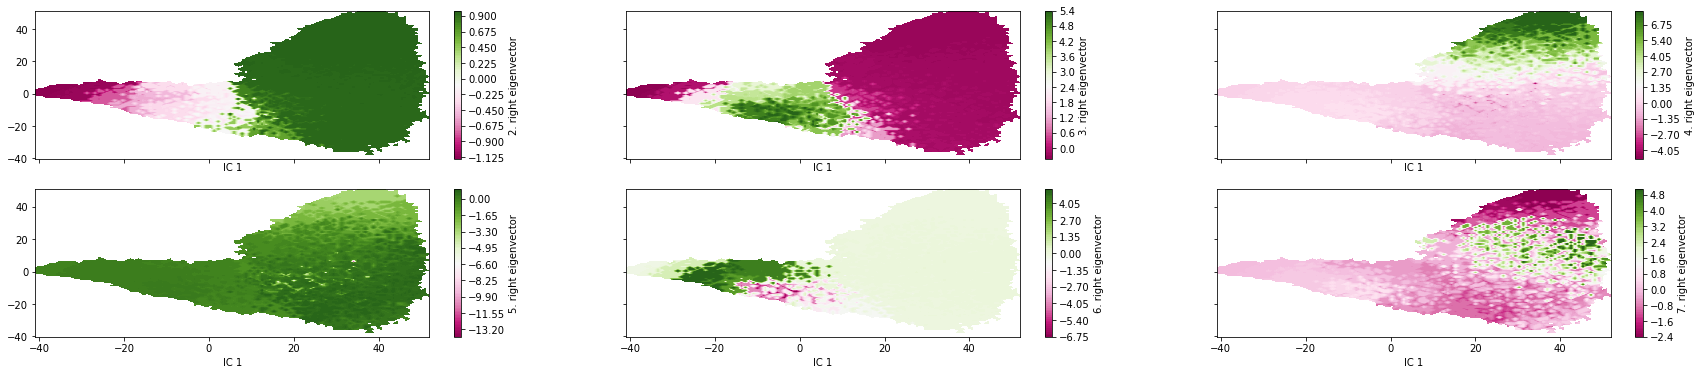

In [187]:
eigvec = distances_msm.eigenvectors_right()
print('The first eigenvector is one: {} (min={}, max={})'.format(
    np.allclose(eigvec[:, 0], 1, atol=1e-15), eigvec[:, 0].min(), eigvec[:, 0].max()))

fig, axes = plt.subplots(2, 3, figsize=(30, 6), sharex=True, sharey=True)
for i, ax in enumerate(axes.flat):
    pyemma.plots.plot_contour(
        *distances_tica_concatenated[:, :2].T,
        eigvec[distances_dtrajs_concatenated, i + 1],
        ax=ax,
        cmap='PiYG',
        cbar_label='{}. right eigenvector'.format(i + 2),
        mask=True)
    ax.set_xlabel('IC 1')
axes[0].set_ylabel('IC 2')
fig.tight_layout()

IndexError: index 6 is out of bounds for axis 0 with size 6

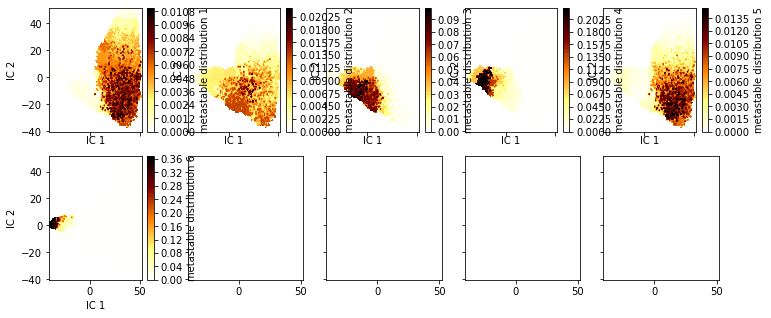

In [102]:
nstates=6
distances_msm.pcca(nstates)
fig, axes = plt.subplots(2, 5, figsize=(12, 5), sharex=True, sharey=True)
for i, ax in enumerate(axes.flat):
    pyemma.plots.plot_contour(
        *distances_tica_concatenated[:, :2].T,
        distances_msm.metastable_distributions[i][distances_dtrajs_concatenated],
        ax=ax,
        cmap='afmhot_r',
        mask=True,
        cbar_label='metastable distribution {}'.format(i + 1))
    ax.set_xlabel('IC 1')
    ax.set_ylabel('IC 2')
fig.tight_layout()

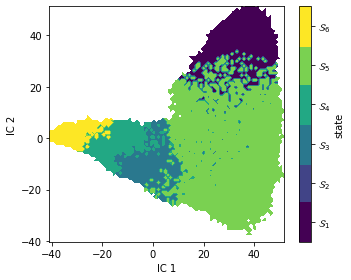

In [103]:
metastable_traj = distances_msm.metastable_assignments[distances_dtrajs_concatenated]

fig, ax = plt.subplots(figsize=(5, 4))
_, _, misc = pyemma.plots.plot_state_map(
    *distances_tica_concatenated[:, :2].T, metastable_traj, ax=ax)
ax.set_xlabel('IC 1')
ax.set_ylabel('IC 2')
misc['cbar'].set_ticklabels([r'$\mathcal{S}_%d$' % (i + 1)
                             for i in range(nstates)])
fig.tight_layout()

In [ ]:
my_samples = [pyemma.coordinates.save_traj(traj_list[0::50], idist, outfile='samples.pdb', top=top)
              for idist in msm.sample_by_distributions(msm.metastable_distributions, 100)]


In [104]:
print('state\tπ\t\tG/kT')
for i, s in enumerate(distances_msm.metastable_sets):
    p = distances_msm.pi[s].sum()
    print('{}\t{:f}\t{:f}'.format(i + 1, p, -np.log(p)))
    

state	π		G/kT
1	0.012389	4.390983
2	0.005817	5.147011
3	0.024838	3.695366
4	0.026035	3.648325
5	0.593488	0.521739
6	0.337434	1.086386


In [105]:

metastable_traj = distances_msm.metastable_assignments[distances_dtrajs_concatenated]
highest_membership =distances_msm.metastable_distributions.argmax(1)
coarse_state_centers = cluster_centers[distances_msm.active_set[highest_membership]]
mfpt = np.zeros((nstates, nstates))
for i in range(nstates):
    for j in range(nstates):
        mfpt[i, j] = distances_msm.mfpt(
            distances_msm.metastable_sets[i],
            distances_msm.metastable_sets[j])*1e-3

inverse_mfpt = np.zeros_like(mfpt)
nz = mfpt.nonzero()
inverse_mfpt[nz] = 1.0 / mfpt[nz]

from pandas import DataFrame
print('MFPT / us:')
DataFrame(np.round(mfpt, decimals=2), index=range(1, nstates + 1), columns=range(1, nstates + 1))


MFPT / us:


,1,2,3,4,5,6
1,0.00,21.44,27.99,36.60,0.11,60.60
2,10.30,0.00,27.14,35.80,0.11,59.79
3,27.72,38.02,0.00,9.79,13.66,32.55
4,35.78,46.12,9.60,0.00,21.83,18.02
5,9.71,21.36,27.64,36.26,0.00,60.26
6,45.94,56.28,19.60,7.47,31.98,0.00


percentage       	path
-------------------------------------
0.8109988796494874  	 [0 4 2 3 5]
0.18900112035051264  	 [0 4 3 5]


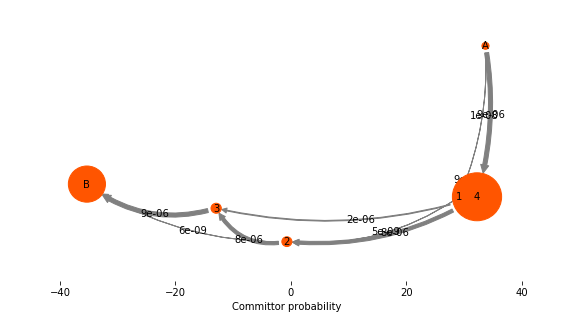

In [106]:
def avg_by_set(x, sets):
    # compute mean positions of sets. This is important because of some technical points the set order
    # in the coarse-grained TPT object can be different from the input order.
    avg = np.zeros(len(sets))
    for i in range(len(sets)):
        I = list(sets[i])
        avg[i] = np.mean(x[I])
    return avg
sets=distances_msm.metastable_sets
cc_x = cluster_centers[:,0]
cc_y = cluster_centers[:,1]
xavg = avg_by_set(cc_x, sets)
A = sets[xavg.argmax()]
B = sets[xavg.argmin()]
fluxAB = pyemma.msm.tpt(distances_msm, A, B)
cg, cgflux = fluxAB.coarse_grain(sets)
avgpos = np.zeros((nstates,2))
avgpos[:,0] = avg_by_set(cc_x, cg)
avgpos[:,1] = avg_by_set(cc_y, cg)
fig,_ = pyemma.plots.plot_flux(cgflux, avgpos, cgflux.stationary_distribution, max_width=10, max_height=7)
paths, path_fluxes = cgflux.pathways(fraction=0.99)
print( 'percentage       \tpath')
print('-------------------------------------')
for i in range(len(paths)):
    print((path_fluxes[i] / np.sum(path_fluxes)),' \t', paths[i])

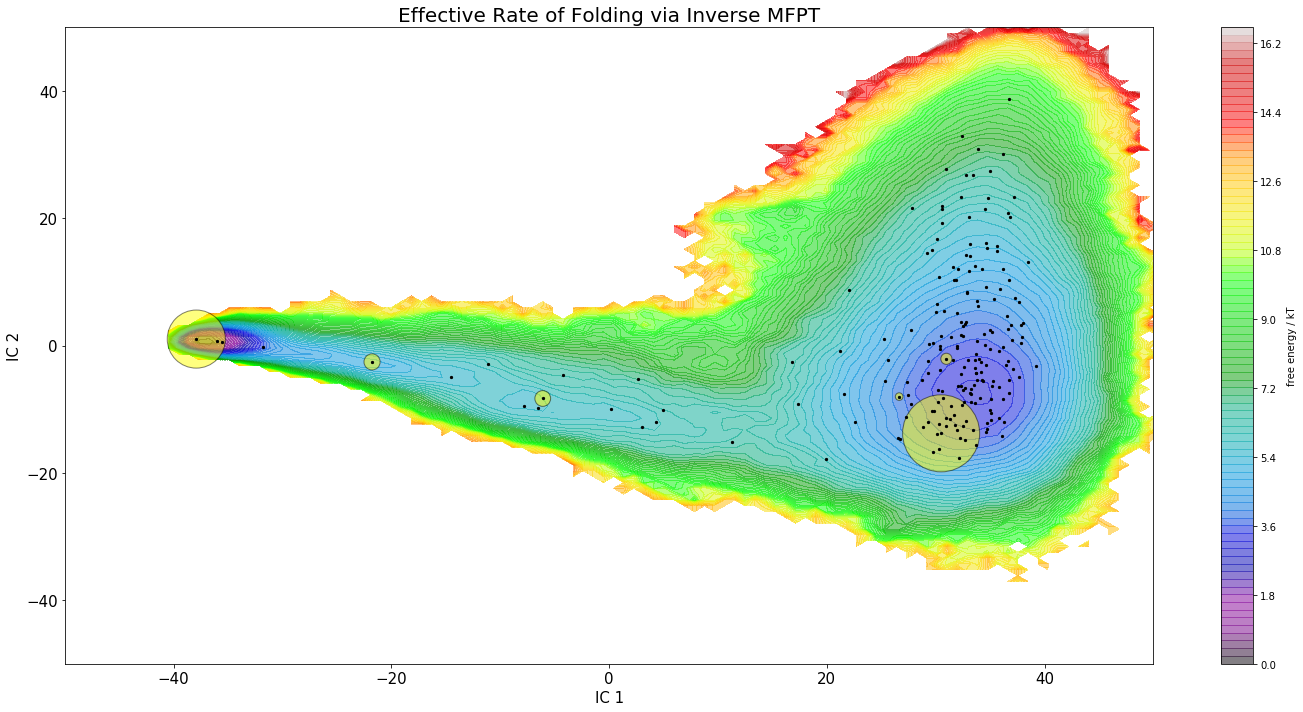

In [107]:
markersize=[]
for i, s in enumerate(distances_msm.metastable_sets):
    p = distances_msm.pi[s].sum()
    markersize.append(p * 10000)
fig, ax = plt.subplots(figsize=(20,10))
#pyemma.plots.plot_network(inverse_mfpt,pos=coarse_state_centers[:, :2],
#    figpadding=0,
#    state_labels=np.arange(1,nstates+1),                      
#   arrow_label_format='%.1f $\\mu$s',
#    arrow_labels=mfpt,
#    arrow_curvature=1.5,
#    size=15,
#    show_frame=True, ax=ax, xticks=True, yticks=True)
pyemma.plots.plot_free_energy(
    *distances_tica_concatenated[:, :2].T,
    weights=np.concatenate(distances_msm.trajectory_weights()),
    ax=ax,
    legacy=False, alpha=0.5, zorder=0)

ax.set_xlim(-50, 50)
ax.set_ylim(-50, 50)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.scatter(coarse_state_centers[:,0],coarse_state_centers[:,1], s=markersize, c='yellow',edgecolors='black', alpha=0.5)
ax.scatter(*cluster_centers[:, :2].T, s=5, c='black')
ax.set_xlabel('IC 1', size=15)
ax.set_ylabel('IC 2', size = 15)
ax.set_title('Effective Rate of Folding via Inverse MFPT', size =20)
fig.tight_layout()
fig.savefig('Effective_rate.png')

In [ ]:
distances_msm.save('msm_8_good',overwrite=True)


In [ ]:
arr = distances_tica.eigenvectors[0]
arr1 = distances_tica.eigenvectors[0]
result = np.where(arr1 == np.amax(arr1))
print(result)

In [ ]:
y = distances_msm.eigenvectors_right()[:,0]
x = np.arange(len(distances_msm.eigenvectors_right()[0]))

In [ ]:
sasa = md.shrake_rupley(md.load('tic1.pdb'),mode = 'residue')


In [122]:
print(traj_list)

['/mnt/d/dylan/RUN0/RUN0_CLONE0.xtc', '/mnt/d/dylan/RUN0/RUN0_CLONE1.xtc', '/mnt/d/dylan/RUN0/RUN0_CLONE10.xtc', '/mnt/d/dylan/RUN0/RUN0_CLONE100.xtc', '/mnt/d/dylan/RUN0/RUN0_CLONE101.xtc', '/mnt/d/dylan/RUN0/RUN0_CLONE102.xtc', '/mnt/d/dylan/RUN0/RUN0_CLONE103.xtc', '/mnt/d/dylan/RUN0/RUN0_CLONE104.xtc', '/mnt/d/dylan/RUN0/RUN0_CLONE105.xtc', '/mnt/d/dylan/RUN0/RUN0_CLONE106.xtc', '/mnt/d/dylan/RUN0/RUN0_CLONE107.xtc', '/mnt/d/dylan/RUN0/RUN0_CLONE108.xtc', '/mnt/d/dylan/RUN0/RUN0_CLONE109.xtc', '/mnt/d/dylan/RUN0/RUN0_CLONE11.xtc', '/mnt/d/dylan/RUN0/RUN0_CLONE110.xtc', '/mnt/d/dylan/RUN0/RUN0_CLONE111.xtc', '/mnt/d/dylan/RUN0/RUN0_CLONE112.xtc', '/mnt/d/dylan/RUN0/RUN0_CLONE113.xtc', '/mnt/d/dylan/RUN0/RUN0_CLONE114.xtc', '/mnt/d/dylan/RUN0/RUN0_CLONE115.xtc', '/mnt/d/dylan/RUN0/RUN0_CLONE116.xtc', '/mnt/d/dylan/RUN0/RUN0_CLONE117.xtc', '/mnt/d/dylan/RUN0/RUN0_CLONE118.xtc', '/mnt/d/dylan/RUN0/RUN0_CLONE119.xtc', '/mnt/d/dylan/RUN0/RUN0_CLONE12.xtc', '/mnt/d/dylan/RUN0/RUN0_CLONE12

In [ ]:
import pandas as pd
df1 = pd.DataFrame(distances_cluster.cluster_centers_[ic1_list[::-1],:3],columns = ['tIC1', 'tIC2', 'tIC3'])
df2 = pd.DataFrame(data=sasa,columns=list(top.residues))
df3 = pd.DataFrame(ic1_list[::-1],columns=['Cluster Center'])
df4 = pd.DataFrame(np.arange(1,101,dtype=int),columns=['Frame'])
data =pd.concat([df4,df3,df1,df2],axis=1)
data = data.set_index(['Frame','Cluster Center'])

In [ ]:
data.to_csv('SASA.csv')

In [157]:
markov_samples = [smpl for smpl in distances_msm.sample_by_state(10)]
samples = [pyemma.coordinates.save_traj(traj_list, smpl, stride=0.02,outfile=None, top=top.topology)
            for smpl in markov_samples]



OSError: Could not obtain info for file /mnt/d/dylan/RUN17/RUN17_CLONE173.xtc. Original error was Malformed XTC file. Number of atoms <= 0. Are you sure this is a valid GROMACS xtc file?

In [ ]:
from mdtraj import shrake_rupley
markov_sasa_all = [shrake_rupley(sample, mode='residue')
                   for sample in samples]

In [ ]:
markov_average_sasa = []
for i in [3,55,2,32,33,16]:
          markov_average_sasa.append(np.array(markov_sasa_all).mean(axis=1)[:,i])

In [ ]:
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20)
plt.rc('font', size=15)
labels = ['S153','S205','S152','T182','L183','A166']
fig, axes = plt.subplots(3, 2, figsize=(20, 20), sharex=True, sharey=True)
for i, ax in enumerate(axes.flat):
    pyemma.plots.plot_contour(
        *distances_tica_concatenated[:, :2].T,
        markov_average_sasa[i][distances_dtrajs_concatenated],
        ax=ax,
        mask=True,
        cbar=True,
        cbar_label=r'%s SASA / nm$^2$'%labels[i], labelsize=15)
    ax.set_xlabel('tIC1')
    ax.set_ylabel('tIC2')

fig.suptitle('Average Solvent Accessible Surface Area for Key Mutated Residues', size =24)
fig.tight_layout(rect=[0, 0.03, 1, 0.95]) 
fig.savefig('SASA_map.png')

In [ ]:
x =distances_cluster.cluster_centers_[ic1_list[-i],:1]
y = markov_average_sasa[distances_dtrajs_concatenated]
plt.plot(x,y)

In [ ]:
#msm_ss_all = [md.compute_dssp(sample)
#                   for sample in samples]
tic1 = md.compute_dssp(md.load('FOX01_FAH/tic1/tic1.pdb'))
print(tic1)       

In [ ]:
ss = pd.DataFrame(np.concatenate(msm_ss_all))
ss.transpose()

In [ ]:
structureH = (ss == 'H').cumsum(0)/len(ss)
structureC = (ss == 'C').cumsum(0)/len(ss)
structureE = (ss == 'E').cumsum(0)/len(ss)
structureH

In [ ]:
list = [3,55,2,32,33,16]
fig, ax = plt.subplots(2,3,figsize=(20,10), sharex=True, sharey=True)
for i,ax in enumerate(ax.flat):
    structureH[structureH.columns[list[i]]].plot(ax=ax, label='Helix')
    structureC[structureC.columns[list[i]]].plot(ax=ax, label='Coil')
    structureE[structureE.columns[list[i]]].plot(ax=ax, label='Beta')
    ax.legend(loc='upper left')
    ax.grid()
    ax.set_title(labels[i])
    ax.set_xlabel('Frame')
    ax.set_ylabel('Cumulative Secondary Stucture', size =18)
fig.tight_layout()

In [ ]:
len(traj_list[0::20])

In [ ]:
data